In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Check If Found NaN

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Replace NaN with Mean Of This Coulmn

In [7]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Encoder To Convert The From String To Numrical

In [10]:
mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
print(df['ocean_proximity'].map(mapping))

0        4
1        4
2        4
3        4
4        4
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: ocean_proximity, Length: 20640, dtype: int64


In [11]:
df['ocean_proximity'] = df['ocean_proximity'].map(mapping)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


# Histogram For The Data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

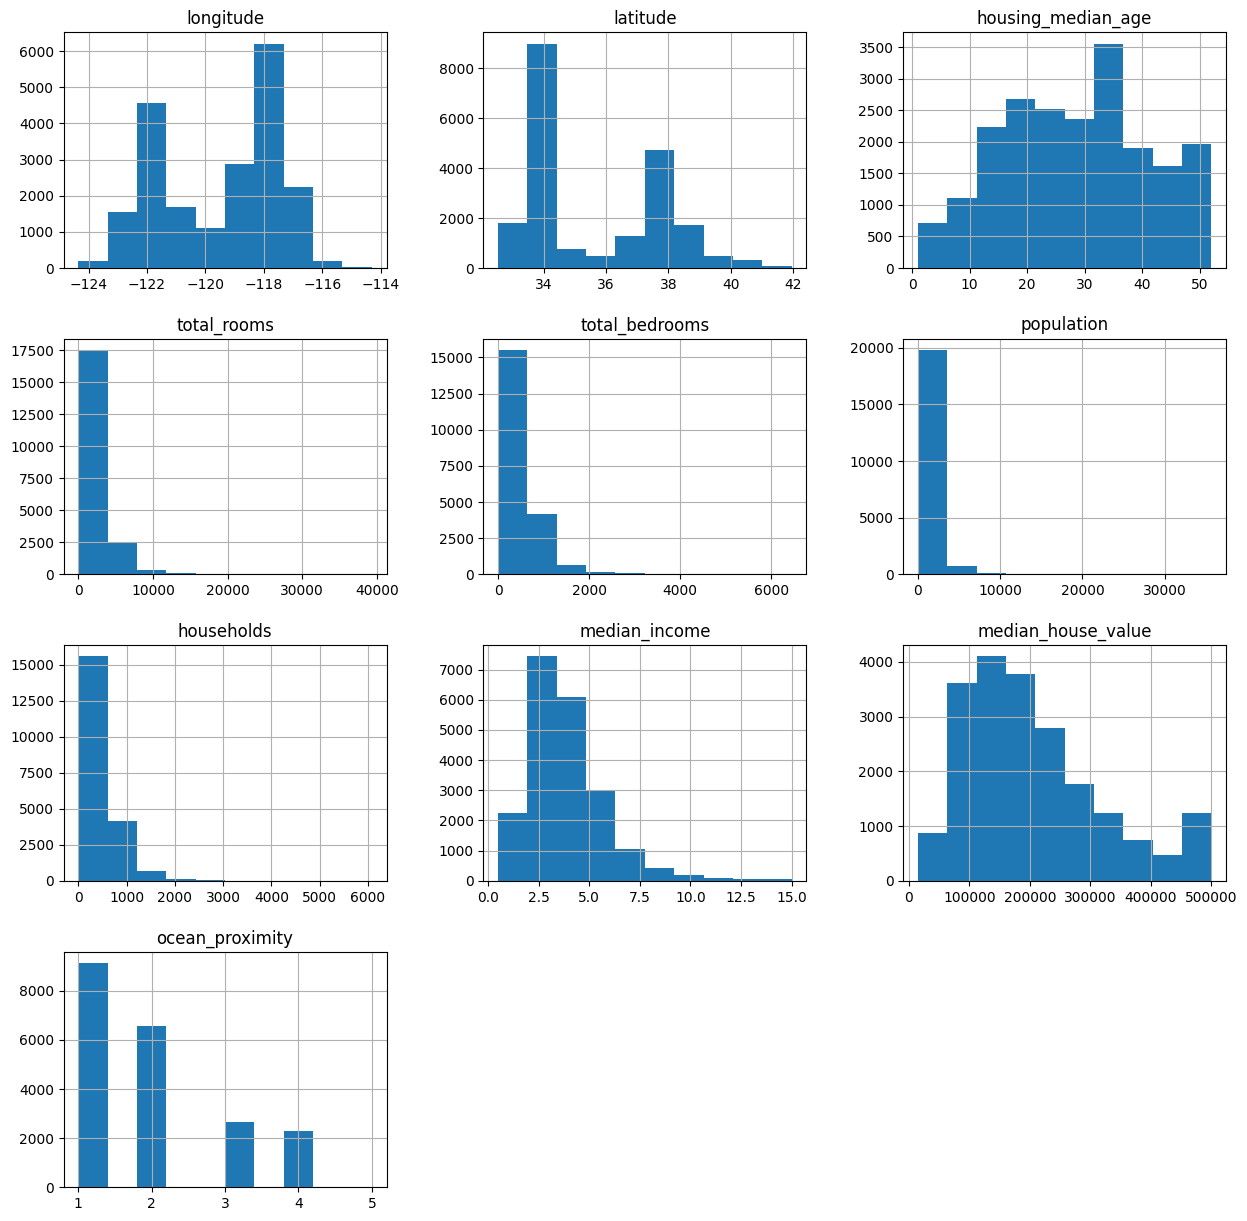

In [13]:
df.hist(figsize=(15, 15))

# Solve The Skewed Left 

In [14]:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

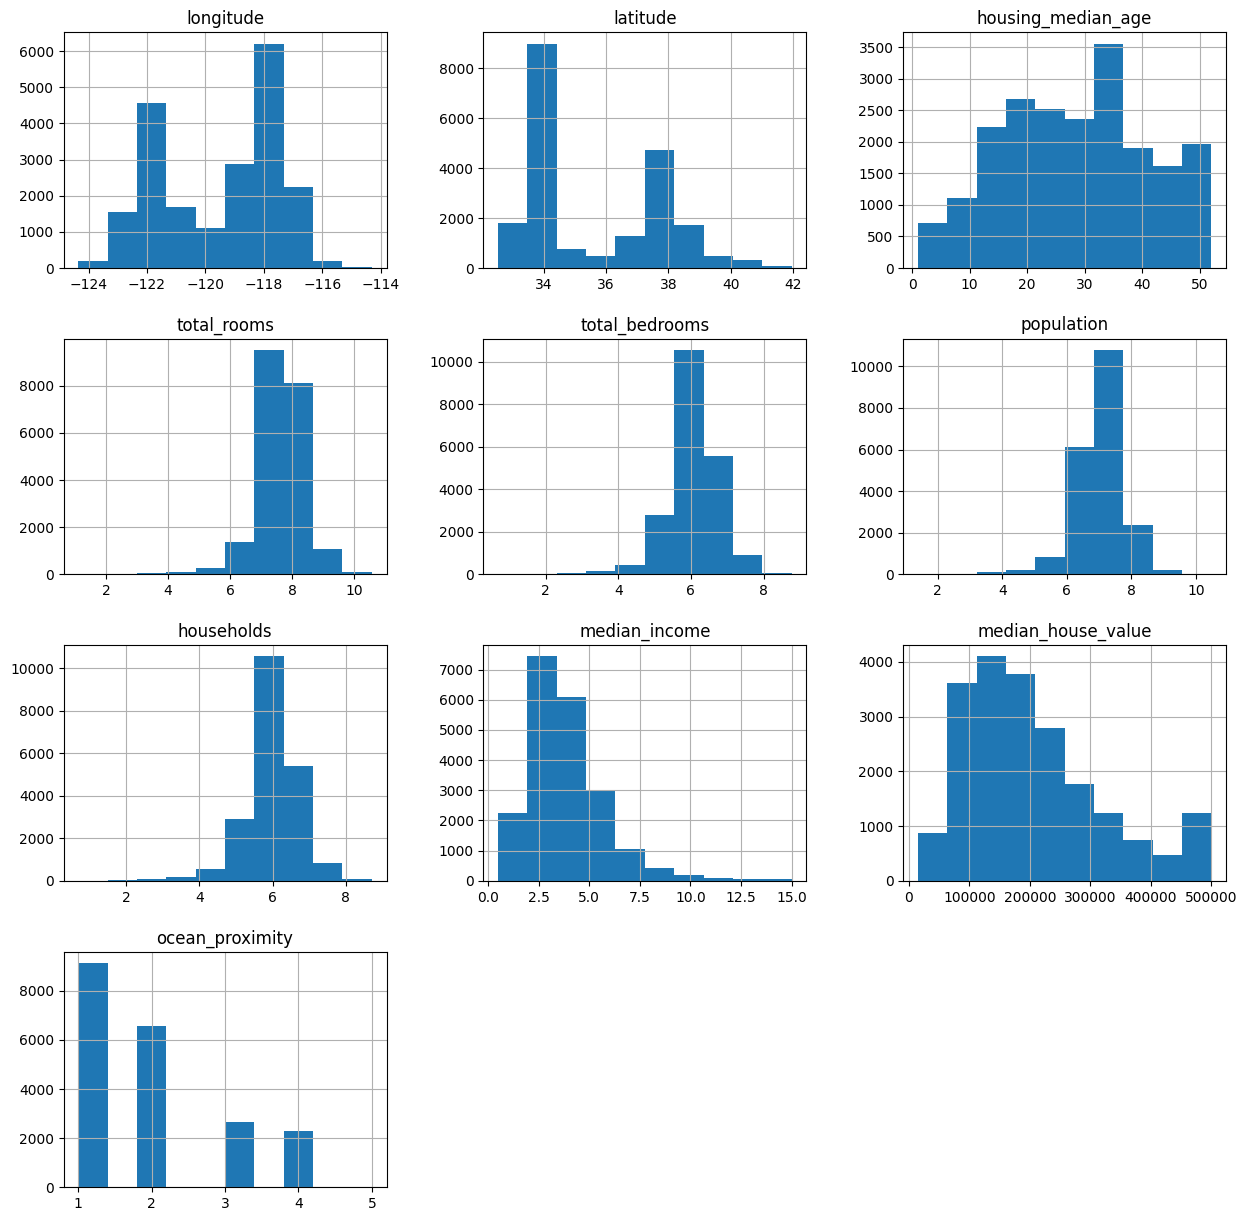

In [15]:
df.hist(figsize=(15, 15))

# Corellation of The Data

<Axes: >

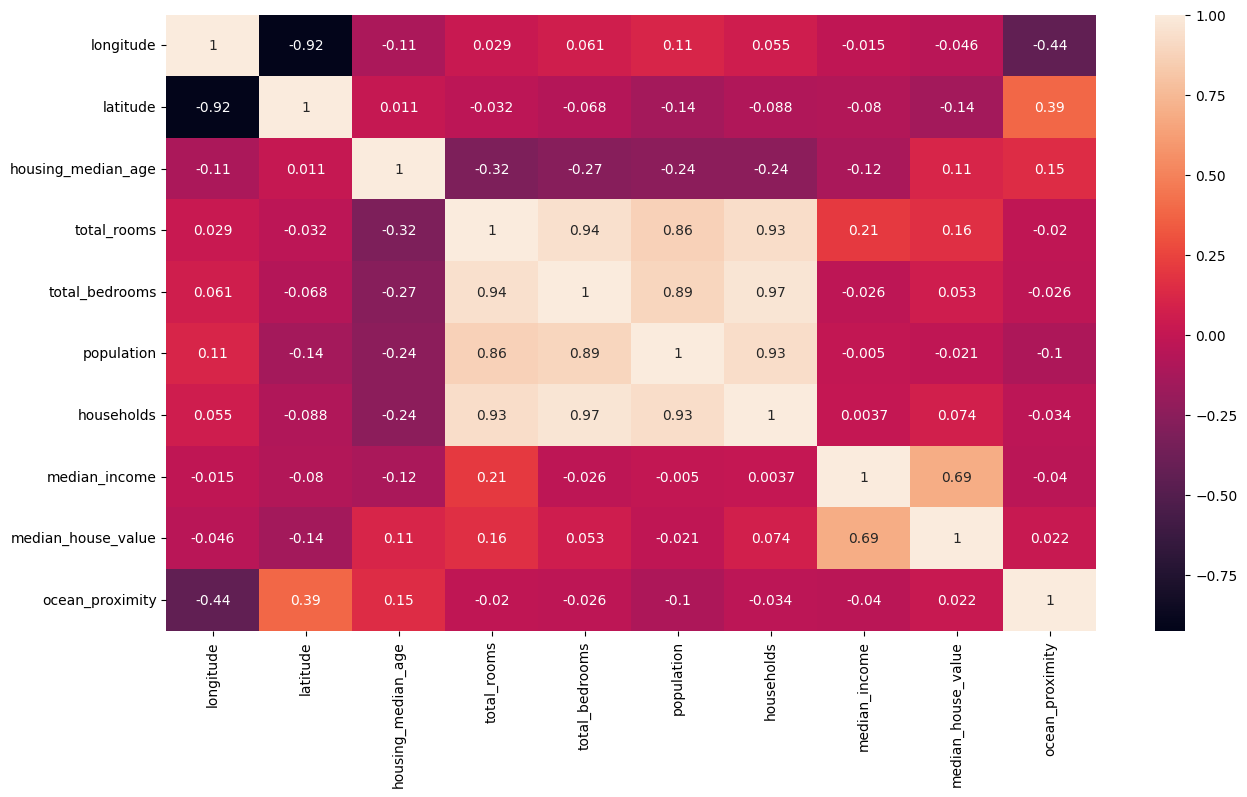

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

# X is The Input
# Y is The Target

In [17]:
x = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

# Split the Data into Train And Test

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Scalar Step

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# Train Linear Regression

In [20]:
reg = LinearRegression()
reg.fit(x_train_sc,y_train)
reg.score(x_test_sc,y_test)

0.6472708638136911

# Train KNN Regresor

In [21]:
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(x_train_sc,y_train)
model2.score(x_test_sc,y_test)

0.7362613346365393

# Predict Y for Linear Regression and KNN Regressor

In [22]:
y_pre_linear = reg.predict(x_test_sc)
y_pre_knn = model2.predict(x_test_sc)

# Mean Absolute Error

In [23]:
print("The Mean Absolute Error For Linear  Regression : ", mean_absolute_error(y_test,y_pre_linear))
print("The Mean Absolute Error For KNN  : ", mean_absolute_error(y_test,y_pre_knn))

The Mean Absolute Error For Linear  Regression :  48879.09965330563
The Mean Absolute Error For KNN  :  39426.22083333334


# Mean Squred Error

In [24]:
print("The Mean Squred Error For Linear  Regression : ", mean_squared_error(y_test,y_pre_linear))
print("The Mean Squred Error For KNN  : ", mean_squared_error(y_test,y_pre_knn))

The Mean Squred Error For Linear  Regression :  4626715781.930396
The Mean Squred Error For KNN  :  3459435924.504574


# R2 Score

In [25]:
print("The R2 Score For Linear  Regression : ", r2_score(y_test,y_pre_linear))
print("The R2 Score For KNN  : ", r2_score(y_test,y_pre_knn))

The R2 Score For Linear  Regression :  0.6472708638136911
The R2 Score For KNN  :  0.7362613346365393


# RMSE

In [26]:
rmse_Linear= np.sqrt(mean_squared_error(y_test,y_pre_linear))
print('The RMSE For Linear Regression : ',rmse_Linear)
rmse_KNN= np.sqrt(mean_squared_error(y_test,y_pre_knn))
print('The RMSE For KNN : ',rmse_KNN)

The RMSE For Linear Regression :  68019.96605358162
The RMSE For KNN :  58816.9696984176


# Finally Found KNN is more Better Than Linear Regression